In [4]:
import pandas as pd

In [5]:
pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Load the dataset
file_path = r"D:\Study Materials\Project\AnomaData_Capstone_Project\data\AnomaData.xlsx"
df = pd.read_excel(file_path)

In [7]:
# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

(None,
                  time  y        x1        x2        x3         x4        x5  \
 0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
 1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
 2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
 3 1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
 4 1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   
 
           x6        x7        x8  ...        x51        x52       x54  \
 0 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721 -4.936434   
 1 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871 -4.937179   
 2 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265 -4.937924   
 3 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660 -4.938669   
 4 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054 -4.939414   
 
          x55        x56       x57       x58       x59       x60 

In [8]:
# Step 1: Data Cleaning & Preprocessing

# Drop duplicate rows if any
df = df.drop_duplicates()

In [9]:
# Check for missing values
missing_values = df.isnull().sum()

In [10]:
# Drop any columns with excessive missing values (threshold: 30% missing)
threshold = 0.3 * len(df)
df = df.dropna(thresh=threshold, axis=1)

In [11]:
# Fill remaining missing values with column median
df = df.fillna(df.median())

In [12]:
# Convert timestamp column to datetime format
df['time'] = pd.to_datetime(df['time'])

In [13]:
# Drop duplicate target column if it exists ('y.1' seems like a duplicate of 'y')
if 'y.1' in df.columns:
    df = df.drop(columns=['y.1'])

In [14]:
# Final dataset shape after preprocessing
df.shape, missing_values.sum()

((18398, 61), 0)

In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [17]:
# Set plot style
sns.set_style("whitegrid")

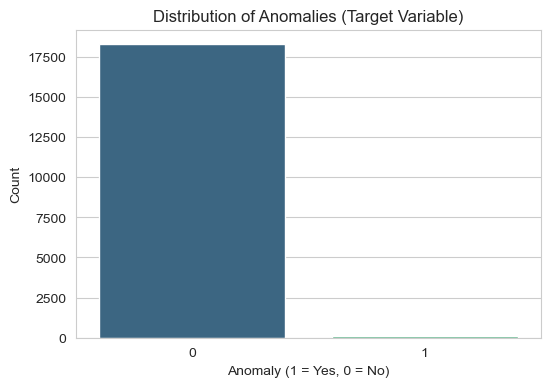

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['y'], hue=df['y'], palette="viridis", legend=False)  # Assign 'y' to hue
plt.title("Distribution of Anomalies (Target Variable)")
plt.xlabel("Anomaly (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

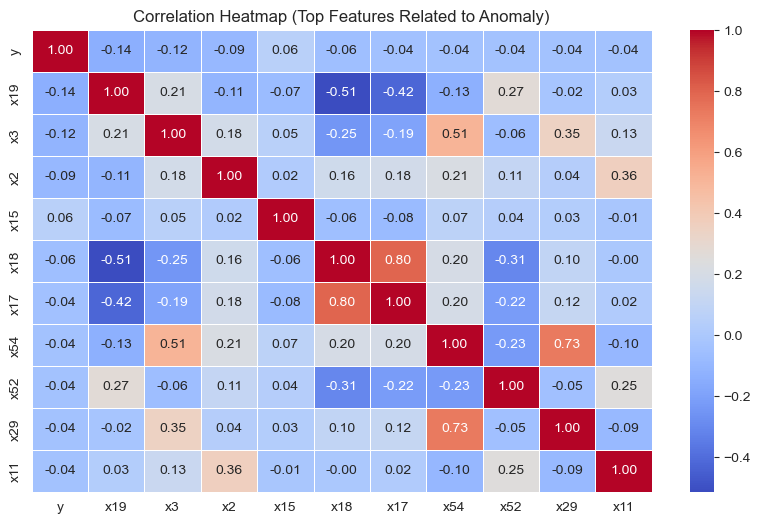

In [19]:
# Correlation heatmap (Top 10 correlated features with 'y')
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
top_corr_features = corr_matrix['y'].abs().sort_values(ascending=False).head(11).index
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Top Features Related to Anomaly)")
plt.show()

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.metrics import classification_report, accuracy_score

In [23]:
# Step 1: Prepare Data
X = df.drop(columns=['y', 'time'])  # Features (exclude target & timestamp)
y = df['y']  # Target variable

In [24]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Step 3: Train Isolation Forest Model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.05, random_state=42)

In [26]:
# Step 4: Predict Anomalies
y_pred = model.predict(X_test)

In [27]:
# Convert Isolation Forest output (-1 for anomaly, 1 for normal) to match target labels (1 for anomaly, 0 for normal)
y_pred = [1 if pred == -1 else 0 for pred in y_pred]

In [28]:
# Step 5: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy, report

(0.9497282608695652,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.97      3655\n           1       0.07      0.48      0.11        25\n\n    accuracy                           0.95      3680\n   macro avg       0.53      0.72      0.54      3680\nweighted avg       0.99      0.95      0.97      3680\n')